<a href="https://colab.research.google.com/github/thefarofa/Invest/blob/main/05_Backtesting_com_Pyfolio_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Importando bibliotecas

In [1]:
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Para corrgir o bug: AttributeError: 'numpy.int64' object has no attribute 'to_pydatetime'
!pip install git+https://github.com/quantopian/pyfolio

  Cloning https://github.com/quantopian/pyfolio to /tmp/pip-req-build-zhqhrsro
  Running command git clone --filter=blob:none --quiet https://github.com/quantopian/pyfolio /tmp/pip-req-build-zhqhrsro
  Resolved https://github.com/quantopian/pyfolio to commit 4b901f6d73aa02ceb6d04b7d83502e5c6f2e81aa
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.3 MB/s eta 0:00:00
  Created wheel for pyfolio: filename=pyfolio-0.9.2+75.g4b901f6-py3-none-any.whl size=75753 sha256=0ae7e291cad2b78bb2434ed160c74a59a32c75f5717c49c890b5327c4a20a759
  Stored in directory: /tmp/pip-ephem-wheel-cache-qrzbhkrz/wheels/25/2f/dd/558b6be9405213c9f6fdb1c5a062028a4da70862268f4116e6
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39755 sha256=b95c07183caf68485925d1234e16a31de242dbacd78cb5f8cedd63c9b8763cda
  Stored in d

In [7]:
import pyfolio as pf
import warnings
warnings.filterwarnings('ignore')

# 2. Obtendo e tratando os dados

In [8]:
tickers = ["ABEV3.SA", "ITSA4.SA", "WEGE3.SA", "USIM5.SA", "VALE3.SA", '^BVSP']
dados_yahoo = web.get_data_yahoo(tickers, period="5y")["Adj Close"]



[*********************100%%**********************]  6 of 6 completed


In [9]:
dados_yahoo

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-10-16,14.735768,7.444375,8.067495,39.749687,8.743203,85718.00000
2018-10-17,14.431067,7.378320,8.043076,40.507477,8.696573,85764.00000
2018-10-18,14.092507,7.153736,7.863978,38.923004,8.584661,83847.00000
2018-10-19,14.270252,7.140525,7.896542,38.943665,8.673260,84220.00000
2018-10-22,14.236397,7.252820,8.507096,40.211250,8.696573,85597.00000
...,...,...,...,...,...,...
2023-10-09,13.170000,8.890000,6.260000,66.379997,34.849998,115156.00000
2023-10-10,13.250000,9.010000,6.300000,66.779999,35.299999,116737.00000
2023-10-11,13.290000,9.150000,6.340000,67.360001,35.169998,117051.00000


In [10]:
retorno = dados_yahoo.pct_change()
retorno

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-10-16,NaN,NaN,NaN,NaN,NaN,NaN
2018-10-17,-0.020678,-0.008873,-0.003027,0.019064,-0.005333,0.000537
2018-10-18,-0.023461,-0.030438,-0.022267,-0.039116,-0.012869,-0.022352
2018-10-19,0.012613,-0.001847,0.004141,0.000531,0.010321,0.004449
2018-10-22,-0.002372,0.015726,0.077319,0.032549,0.002688,0.016350
...,...,...,...,...,...,...
2023-10-09,-0.001516,-0.011123,-0.011058,-0.007179,0.001437,0.008636
2023-10-10,0.006074,0.013498,0.006390,0.006026,0.012913,0.013729
2023-10-11,0.003019,0.015538,0.006349,0.008685,-0.003683,0.002690


In [11]:
retorno_acumulado = (1 + retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,^BVSP
Date,,,,,,
2018-10-16,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2018-10-17,0.979322,0.991127,0.996973,1.019064,0.994667,1.000537
2018-10-18,0.956347,0.960959,0.974773,0.979203,0.981867,0.978173
2018-10-19,0.968409,0.959184,0.978810,0.979723,0.992000,0.982524
2018-10-22,0.966112,0.974269,1.054490,1.011612,0.994667,0.998588
...,...,...,...,...,...,...
2023-10-09,0.893744,1.194190,0.775953,1.669950,3.985953,1.343428
2023-10-10,0.899173,1.210310,0.780912,1.680013,4.037422,1.361873
2023-10-11,0.901887,1.229116,0.785870,1.694605,4.022553,1.365536


In [12]:
carteira = 10000 * retorno_acumulado.iloc[:, :5]
carteira["saldo"] = carteira.sum(axis=1)
carteira["retorno"] = carteira["saldo"].pct_change()
carteira

,ABEV3.SA,ITSA4.SA,USIM5.SA,VALE3.SA,WEGE3.SA,saldo,retorno
Date,,,,,,,
2018-10-16,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,50000.000000,NaN
2018-10-17,9793.223641,9911.269451,9969.730649,10190.640396,9946.667251,49811.531389,-0.003769
2018-10-18,9563.469687,9609.585841,9747.731572,9792.027786,9818.667564,48531.482449,-0.025698
2018-10-19,9684.091063,9591.839859,9788.095632,9797.225412,9920.002513,48781.254479,0.005147
2018-10-22,9661.116056,9742.685507,10544.903871,10116.117420,9946.667251,50011.490105,0.025219
...,...,...,...,...,...,...,...
2023-10-09,8937.436985,11941.903608,7759.533734,16699.501792,39859.531826,85197.907945,-0.003488
2023-10-10,8991.726603,12103.098997,7809.115370,16800.131898,40374.218211,86078.291080,0.010333
2023-10-11,9018.871412,12291.159644,7858.697006,16946.045457,40225.530063,86340.303583,0.003044


# 3. Resultados

Start date,2018-10-16
End date,2023-10-16
Total months,59
,Backtest
Annual return,11.54%
Cumulative returns,71.154%
Annual volatility,27.497%
Sharpe ratio,0.54
Calmar ratio,0.29
Stability,0.63
Max drawdown,-39.153%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,39.15,2020-02-19,2020-03-18,2020-07-17,108
1,33.57,2021-07-28,2022-06-17,NaT,NaN
2,13.37,2021-01-08,2021-03-24,2021-07-28,144
3,12.53,2019-03-19,2019-05-16,2019-07-01,75
4,12.44,2019-07-10,2019-08-26,2019-11-07,87


Stress Events,mean,min,max
New Normal,0.06%,-14.40%,10.22%


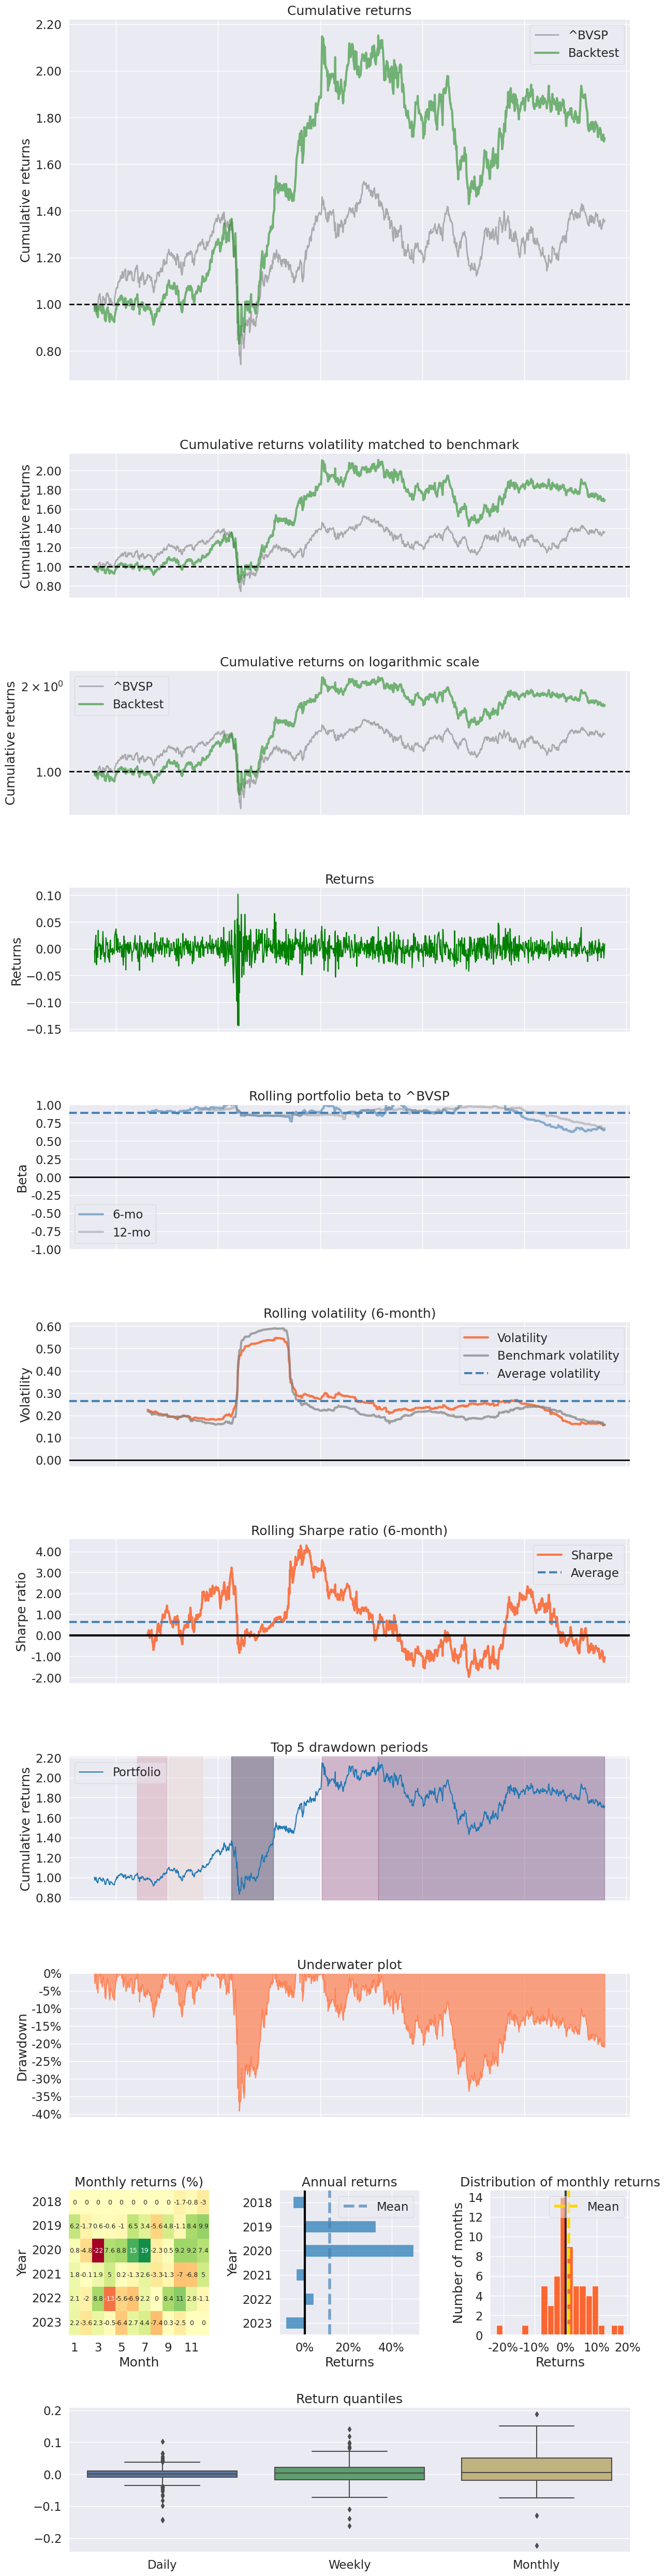

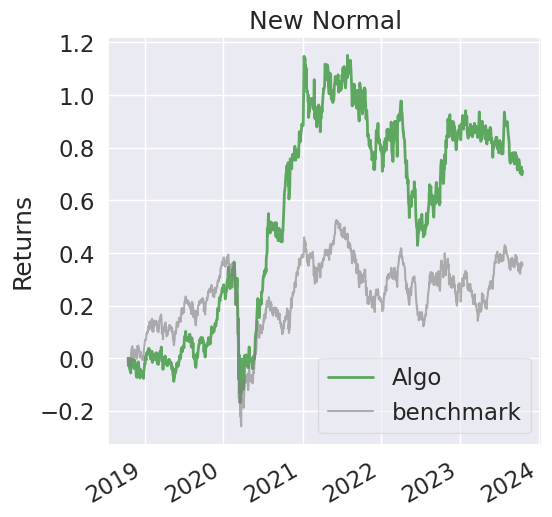

In [13]:
pf.create_full_tear_sheet(carteira["retorno"], benchmark_rets=retorno["^BVSP"])


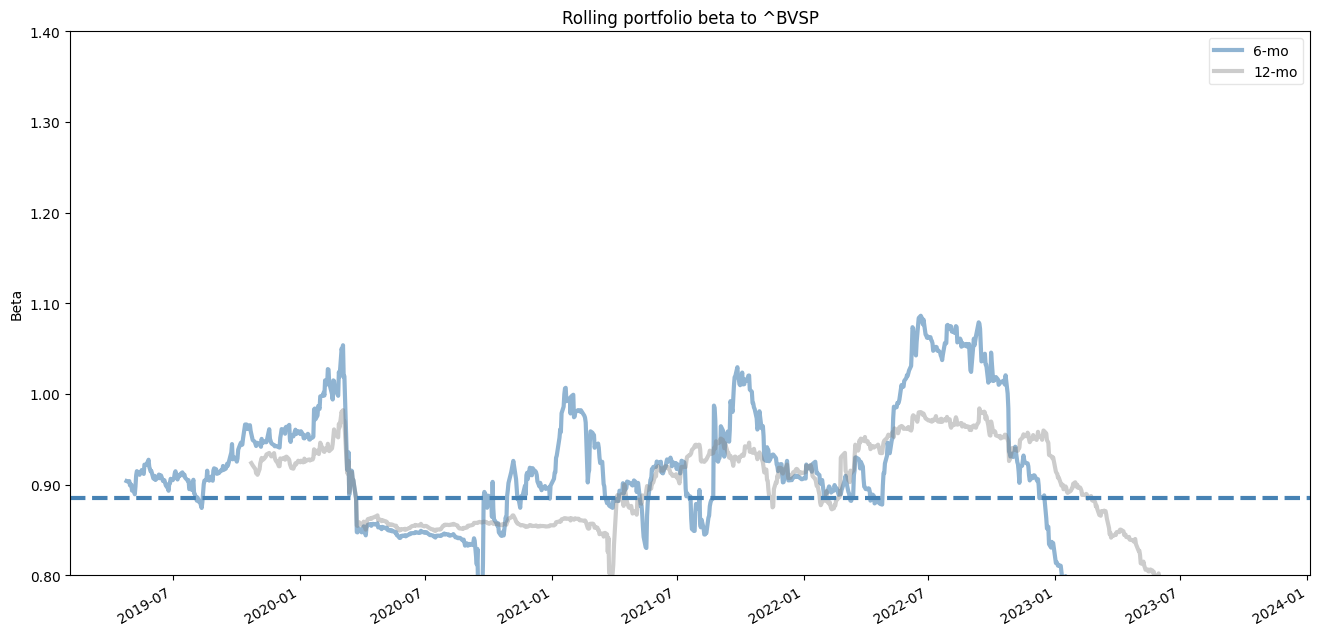

In [14]:
fig, ax1 = plt.subplots(figsize=(16,8))
pf.plot_rolling_beta(carteira["retorno"], factor_returns=retorno["^BVSP"], ax=ax1)
plt.ylim((0.8, 1.4));